In [38]:
from tensorflow import keras
print(keras.__version__)

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

2.4.0


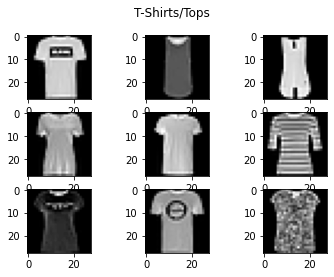

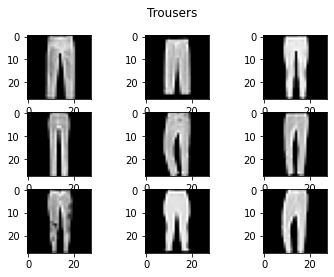

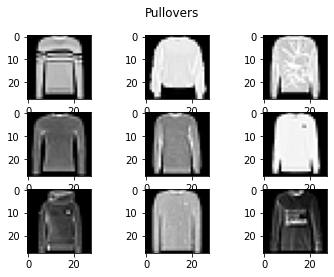

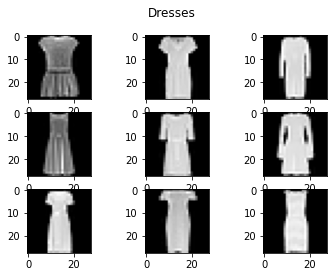

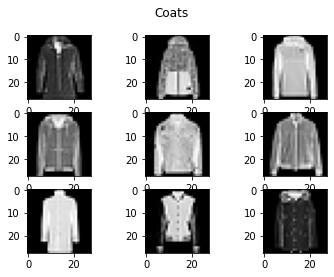

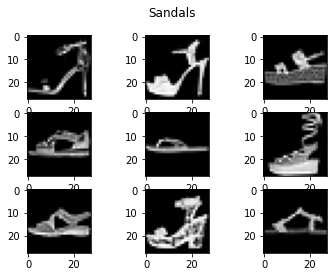

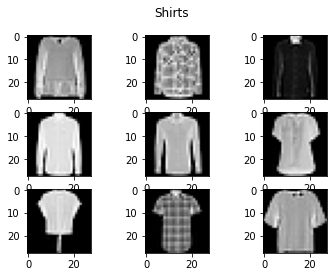

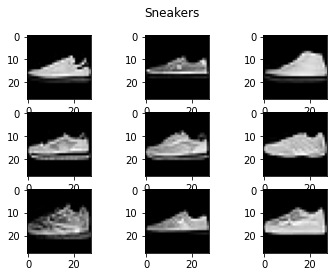

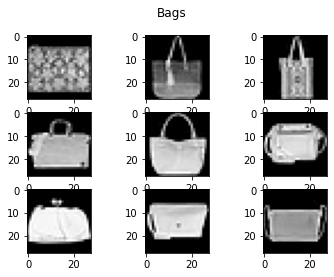

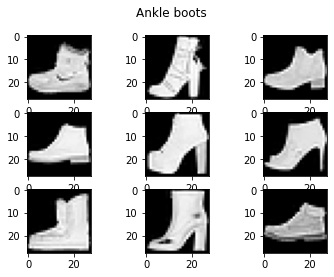

In [51]:
from matplotlib import pyplot
import numpy as np

# SOURCE: https://machinelearningmastery.com/how-to-load-and-visualize-standard-computer-vision-datasets-with-keras/

def plot_greyscale_matrix(X, title=""):
    """
        Plots a 3x3 matrix with greyscale images from X.
    """
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i) # 3x3, and plot image 1+i
        pyplot.suptitle(title)
        # plot raw pixel data
        pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
    
    # Saving figure(s) - uncomment if unwanted
    title_snake_case = title.lower()
    title_snake_case = title_snake_case.replace(' ', '_')
    title_snake_case = title_snake_case.replace('/', '_')
    pyplot.savefig(f"pics/initial/{title_snake_case}.png")
    
    # show the figure
    pyplot.show()


top = np.where(y_train == 0) # T-shirts/top
trousers = np.where(y_train == 1) 
pullover = np.where(y_train == 2)
dress = np.where(y_train == 3)
coat = np.where(y_train == 4) 
sandal = np.where(y_train == 5) 
shirt = np.where(y_train == 6) 
sneaker = np.where(y_train == 7)
bag = np.where(y_train == 8)
ankle_boot = np.where(y_train == 9)

plot_greyscale_matrix(X_train[top[0]], "T-Shirts/Tops")
plot_greyscale_matrix(X_train[trousers[0]], "Trousers")
plot_greyscale_matrix(X_train[pullover[0]], "Pullovers")
plot_greyscale_matrix(X_train[dress[0]], "Dresses")
plot_greyscale_matrix(X_train[coat[0]], "Coats")
plot_greyscale_matrix(X_train[sandal[0]], "Sandals")
plot_greyscale_matrix(X_train[shirt[0]], "Shirts")
plot_greyscale_matrix(X_train[sneaker[0]], "Sneakers")
plot_greyscale_matrix(X_train[bag[0]], "Bags")
plot_greyscale_matrix(X_train[ankle_boot[0]], "Ankle boots")


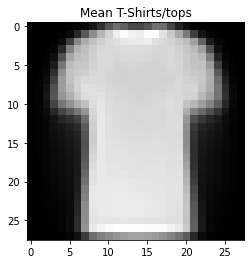

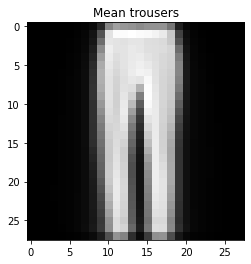

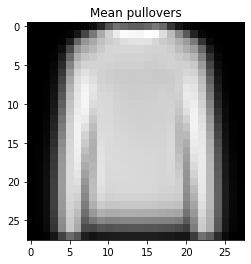

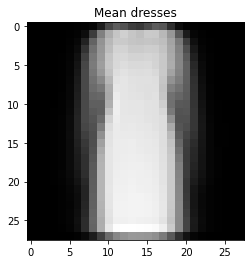

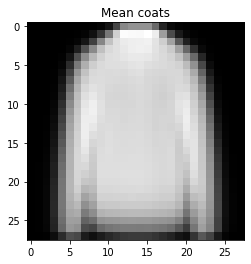

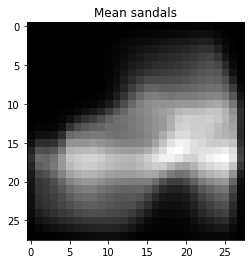

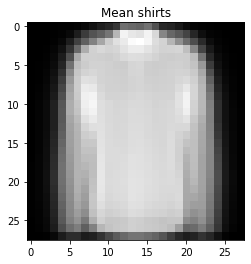

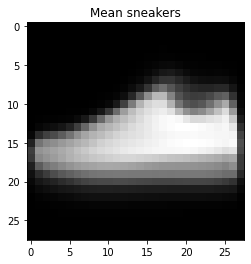

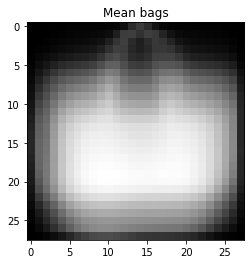

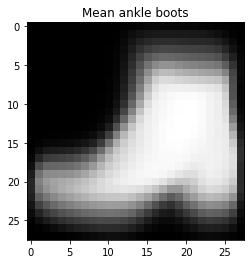

In [9]:
# Median images:

def plot_median_greyscale_image(X, title=""):
    """
        Plots a median greyscale image from X.
    """
    X_mean = np.mean( np.array([ *X ]), axis=0 ) # Mean as an m*n matrix based on all the values in X.
    pyplot.figure()
    pyplot.imshow(X_mean, cmap=pyplot.get_cmap('gray'))
    pyplot.title(title)

    # Saving figure(s) - uncomment if unwanted
    title_snake_case = title.lower()
    title_snake_case = title_snake_case.replace(' ', '_')
    title_snake_case = title_snake_case.replace('/', '_')
    pyplot.savefig(f"pics/initial/{title_snake_case}.png")

    pyplot.show()



top = np.where(y_train == 0) # T-shirts/top
trousers = np.where(y_train == 1) 
pullover = np.where(y_train == 2)
dress = np.where(y_train == 3)
coat = np.where(y_train == 4) 
sandal = np.where(y_train == 5) 
shirt = np.where(y_train == 6) 
sneaker = np.where(y_train == 7)
bag = np.where(y_train == 8)
ankle_boot = np.where(y_train == 9)


plot_median_greyscale_image(X_train[top[0]], "Mean T-Shirts/tops")
plot_median_greyscale_image(X_train[trousers[0]], "Mean trousers")
plot_median_greyscale_image(X_train[pullover[0]], "Mean pullovers")
plot_median_greyscale_image(X_train[dress[0]], "Mean dresses")
plot_median_greyscale_image(X_train[coat[0]], "Mean coats")
plot_median_greyscale_image(X_train[sandal[0]], "Mean sandals")
plot_median_greyscale_image(X_train[shirt[0]], "Mean shirts")
plot_median_greyscale_image(X_train[sneaker[0]], "Mean sneakers")
plot_median_greyscale_image(X_train[bag[0]], "Mean bags")
plot_median_greyscale_image(X_train[ankle_boot[0]], "Mean ankle boots")

Text(0.5, 1.0, 'Labels in Fashion-MNIST dataset')

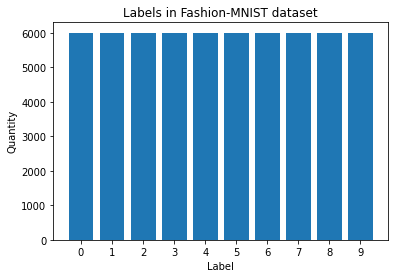

In [57]:
# Histogram of label occurency

unique, counts = np.unique(y_train, return_counts=True)
pyplot.bar(unique, counts)
pyplot.xticks(unique)
pyplot.xlabel("Label")
pyplot.ylabel("Quantity")
pyplot.title("Labels in Fashion-MNIST dataset")

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class ImageFloatConverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        from skimage import img_as_float 
        import numpy as np
    
        X_ = np.zeros(X.shape, dtype=np.float)
        for i in range(X.shape[0]):
            X_[i] = img_as_float(X[i])
        return X_
    
scaler = ImageFloatConverter()
x = scaler.transform(X_train)



In [61]:
np.unique(x[42] * 255 == X_train[42], return_counts=True)

(array([False,  True]), array([ 16, 768], dtype=int64))

In [65]:
# Test scaler max diviation
np.max(np.abs(x[42] * 255 - X_train[42]))

2.842170943040401e-14

In [81]:
class ImageAsSerial(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        import numpy as np
        X_ = np.zeros((X.shape[0], X.shape[1] * X.shape[2]), dtype=np.float)
        for i in range(X.shape[0]):
            X_[i] = X[i].ravel()
        return X_

In [91]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([
    ('ImageFloatConverter', ImageFloatConverter()),
    ('Serialize', ImageAsSerial()),
    ('SGDClassifier', SGDClassifier(max_iter=100, tol=1e-3))])


pipe.fit(X_train, y_train)

Pipeline(steps=[('ImageFloatConverter', ImageFloatConverter()),
                ('Serialize', ImageAsSerial()),
                ('SGDClassifier', SGDClassifier())])

In [93]:
pipe.score(X_test, y_test)

0.8308